# Downloading Google's Earth Engine Images

To use Earth Engine you will need to authenticate your session first

In [12]:
from urllib.request import urlopen
import zipfile
import rasterio
import matplotlib.pyplot as plt
from matplotlib import cm
import ee
ee.Initialize()

### Single image

In [13]:
bbox = (60, 20, 80., 40)
scale = 250
image_name = 'COPERNICUS/S2/20150828T110656_20160412T015159_T30SVG'  #This is the name of the image resource in the E.E. catalouge
bands = ['B8', 'B4', 'B3']    # Those are the bands of the image we wish to access
download_zip = 'testing.zip'  # This is a temporary file we will download the data to

If so desired, you could download only a region or geometrical subset of the Image. We demonstrate how to do this via the bbox setting above, and the region key in the dictionary below. Passing the an ee.Geometry object, such as a bounding box, as we show here, would cause the downloaded image to be within that location only.

In [14]:
image = ee.Image(image_name)


url = image.select(bands).getDownloadUrl({'min':0,      # 
                            'max':3000,
                            'scale': scale,  # scale in meters 
                            'crs': 'EPSG:4326'
                            #'region': ee.Geometry.Rectangle(bbox).toGeoJSONString()
                           })

print('Downloading image...')
print("url: ", url)
data = urlopen(url)
with open(download_zip, 'wb') as fp:
    while True:
        chunk = data.read(16 * 1024)
        if not chunk: break
        fp.write(chunk)
print('Download complete!')

url:  https://earthengine.googleapis.com/api/download?docid=9f2547d53d0bd35bdb61529b4ad78011&token=97f0e64d1278be94aacb541651520fac
Download complete!


In [15]:
# extract the zip file transformation data
z = zipfile.ZipFile(download_zip, 'r')
target_folder_name = download_zip.split('.zip')[0]
z.extractall(target_folder_name)

In [97]:
# Load tiff file data
with rasterio.open('testing/20150828T110656_20160412T015159_T30SVG.B8.tif') as src:
    data = src.read()
    profile = src.profile
    transform = src.transform

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


Profile {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 557, 'height': 444, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': (-4.138987671580695, 0.002245788210298804, 0.0, 37.94932917762919, 0.0, -0.002245788210298804), 'affine': Affine(0.002245788210298804, 0.0, -4.138987671580695,
       0.0, -0.002245788210298804, 37.94932917762919), 'tiled': False}
Dimensions (1, 444, 557)


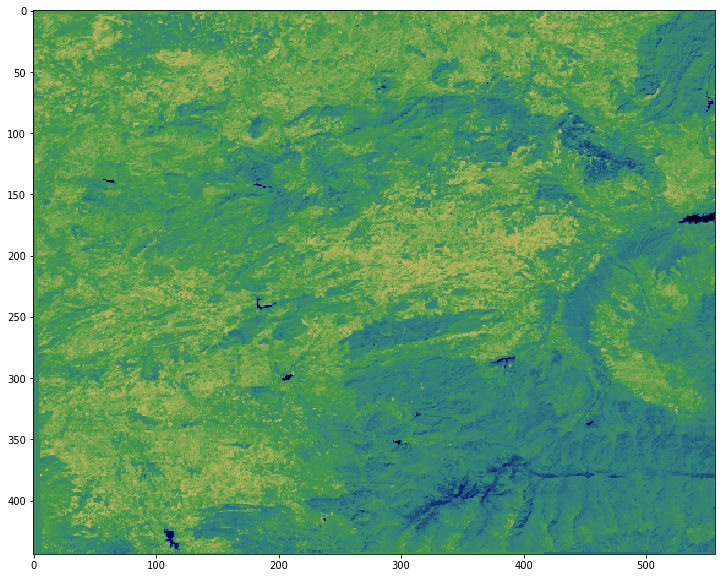

In [98]:
print("Profile", src.profile)
print("Dimensions", data.shape)

plt.figure(figsize=(14,10))
plt.imshow(data[0,:,:], interpolation=None, cmap=cm.gist_earth)
plt.show()

### Image collection

In [7]:
dataset = ee.ImageCollection('COPERNICUS/S2').filterDate('2018-01-01', '2018-01-05')

In [8]:
datasetList = dataset.toList(dataset.size())
datasetSize = datasetList.size().getInfo()

In [26]:
image = ee.Image(datasetList.get(2220))

url = image.select(bands).getDownloadUrl({'min':0,      # 
                            'max':3000,
                            'scale': scale,  # scale in meters 
                            'crs': 'EPSG:4326'
                            #'region': ee.Geometry.Rectangle(bbox).toGeoJSONString()
                           })

print('Downloading image...')
print("url: ", url)
data = urlopen(url)
with open(download_zip, 'wb') as fp:
    while True:
        chunk = data.read(16 * 1024)
        if not chunk: break
        fp.write(chunk)
print('Download complete!')

url:  https://earthengine.googleapis.com/api/download?docid=a158efefa814863c16f2fda701ad2d2b&token=296510143d84c5d23a043ef45575d72f
Download complete!


In [27]:
# extract the zip file transformation data
z = zipfile.ZipFile(download_zip, 'r')
target_folder_name = download_zip.split('.zip')[0]
z.extractall(target_folder_name)

In [29]:
# Load tiff file data
with rasterio.open('testing/20180101T064249_20180101T064825_T41SLT.B3.tif') as src:
    data = src.read()
    profile = src.profile
    transform = src.transform

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


Profile {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 537, 'height': 448, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': (60.824927887732805, 0.002245788210298804, 0.0, 34.33810173546871, 0.0, -0.002245788210298804), 'affine': Affine(0.002245788210298804, 0.0, 60.824927887732805,
       0.0, -0.002245788210298804, 34.33810173546871), 'tiled': False}
Dimensions (1, 448, 537)


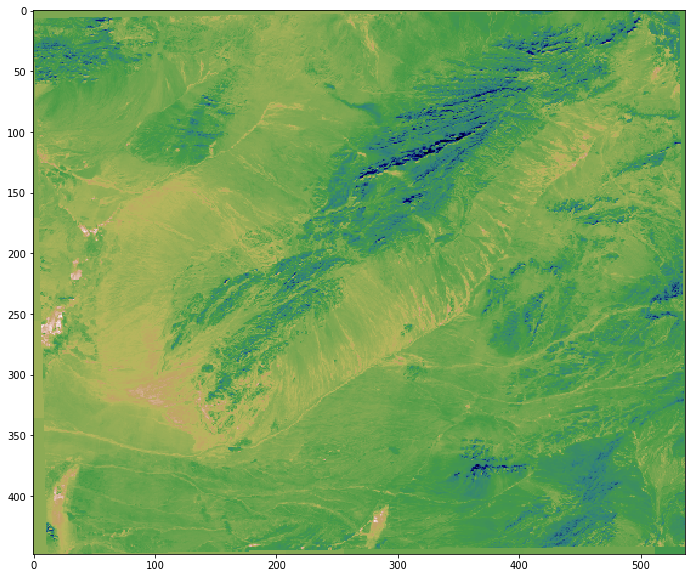

In [30]:
print("Profile", src.profile)
print("Dimensions", data.shape)

plt.figure(figsize=(14,10))
plt.imshow(data[0,:,:], interpolation=None, cmap=cm.gist_earth)
plt.show()